# OOP Polymorphism


In [2]:
# example with Python built in

#Example of Plymorphic behavior
print(f"{len([1,23,4])=}") # Length of a list
print(f"{len('1234')=}") # Length of string

len([1,23,4])=3
len('1234')=4


## Polymorphism in class method

In [3]:
from unicodedata import name


class Fish: # Fish template
    def __init__(self, name) -> None:
        self.name = name

    # Overrided dunder string method
    def __str__(self): #Overrides what we prints?
        return f"I am a fish with a name {self.name}"

    # Overrided dunder repper method, so that it is not default
    def __repr__(self) -> str:
        return f"Fish(name = '{self.name}')"

    def speak(self):
        print("Bluppy blip blib bloop")

class Fox:
    def __init__(self, name) -> None:
        self.name = name

    def __str__(self) -> str:
        return f"I am a fox with a name {self.name}, my sound is mysterious"

    def speak(self):
        return NotImplemented



In [4]:
fish1 = Fish("Guppie")

print(fish1)

repr(fish1)

fish1.speak()

I am a fish with a name Guppie
Bluppy blip blib bloop


In [5]:
fox1 = Fox("Ylvis")

animals = (fish1, fox1) #lists are mutational, touples are not

for animal in animals:
    print(animal)
    animal.speak()

I am a fish with a name Guppie
Bluppy blip blib bloop
I am a fox with a name Ylvis, my sound is mysterious


## Operator overloading

- Magic, Dunder, Special operator, Loved child has many names.
- ```py 
    "+" = __add__(self, other) , "<" = __lt__(self, other), "-="  = __isub__(self, other) "/=" = __idiv__(self, other) "-" = __neg__(self)
-
-


In [42]:
from __future__ import annotations # In this case it allows us to get a functionality from Python 3.10, in def __init__ its the | symbol to check for both float and int
import matplotlib.pyplot as plt

class Vector:
    """"A class to represent Euclidean vector with magnitude and direction""" # This enables the help() method. And shows type hinting when we hover over

    def __init__(self, *numbers: float | int) -> None: # *numbers  = arbitrary ammount of positional args, so can be many, instead of number1, number2, number3 and so on.
        # validation
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number") # Helps the programmer get functional error messages

        if len(numbers) <= 0:
            raise ValueError("Vectors can't be empty")

        self._numbers = tuple(float(number) for number in numbers) #tuple chomprehension, type generator.
    
    @property
    def numbers(self) -> tuple:
        """Returns numbers"""
        return self._numbers # tuple

    # operator overload + addition
    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            # (1,2)+,(2,3) -> numbers = 1+2, 2+3
            numbers = (a+b for a,b in zip(self.numbers, other.numbers)) # creates a tuple list, Self is itself a Vector, Inserts another Vector,(other) and 
            return Vector(*numbers)

    # operator overload - subtraction
    def __sub__ (self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a-b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def validate_vectors(self, other: Vector) -> bool: # This does not need to be in the beginning because the program checks all methods in a class before running.
        """Validates if two vectors have same length"""
        if not isinstance(other, Vector) or len(other) != len(self): #isistance checks if instance is a part of the Vector class.
            raise TypeError("Both must be Vectors and have the same lenght")
        return len(self) == len(other) # Evaluates to either true or False

    # to use len() on Vector we have to overload it
    def __len__(self) -> int:
        """Return number of elements in a Vector, not the norm""" #norm is the total value of a vector

        return len(self.numbers)

    # operator overload [] operator - __getitem__()
    def __getitem__(self, item: int) -> float:
        return self.numbers[item] #Allows us to get index in the same way we do with lists. e.g. list[1]

    # overload abs() function
    def __abs__(self) -> float:
        """Returns Euclidean 2nd norm of a Vector""" #norm is the total distance
        return sum(a**2 for a in self.numbers)**.5 # **.5 = square root of. #we take the sum of all a in self.numbers. and take the square root of to calculate euclidian distance.

    # multiplication, does not need to "kommetera", a*b != b*a ? Reflection multiplication
    def __mul__(self, value: float) -> Vector: # -> hint
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    def __rmul__(self, value: float) -> Vector:
        print("__rmul__ called")
        return self*value



    def plot(self, *others: "Vector") -> None:
        """ Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(0, 5)
        plt.ylim(0, 5)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()

    @staticmethod
    def is2D(vector: Vector) -> bool:
        return len(vector) == 2

    def __repr__(self) -> str:
        return f"Vector{self._numbers}"


v1 = Vector(1,2,3)
print(v1)

try:
    v2 = Vector()
except ValueError as err:
    print(err)

v2 = Vector(-1,-2)

print(v2.numbers)



v3 = Vector(2,3)
print(f"{len(v3[1])=}")

print(f"{abs(Vector(3,4))=}")

Vector(1.0, 2.0, 3.0)
Vectors can't be empty
(-1.0, -2.0)


TypeError: object of type 'float' has no len()

In [36]:
Vector(1,2)*5 #__mul__

__mul__ called


Vector(5.0, 10.0)

In [40]:
5*Vector(1,2) #__rmul__

__rmul__ called
__mul__ called


Vector(5.0, 10.0)

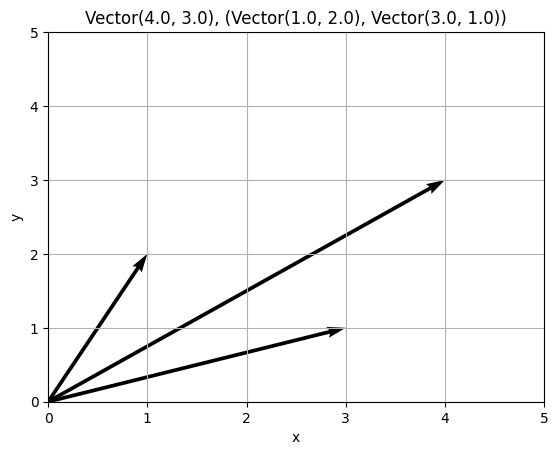

In [28]:
v1 = Vector(1,2)
v2 = Vector(3,1)
v3 = v1+v2

v3.plot(v1,v2)

In [7]:
Vector(1,2)-Vector(3,5,2) #Vectors must be the same length

TypeError: Both Vectors must have the same lenght

In [ ]:
print(f"{v2 = }, {v3 = }, {v3+v2}")


print(v2.__add__(v3))
v3+v2 # is the same as above 
# We can do this because we have "overloaded" 
# + operator works in different ways, we have used __add__ in order to add in a way we want to.

v2 = Vector(-1.0, -2.0), v3 = Vector(2.0, 3.0), Vector(1.0, 1.0)
Vector(1.0, 1.0)


Vector(1.0, 1.0)

In [ ]:
v1-v3 # cant use minus because we have not added the __sub__ operand
#We have now set the minus operand in the code

Vector(-1.0, -1.0)

In [ ]:
len(v2), len(v1)

(2, 3)

In [ ]:
v2+Vector(1,2,3) #logical error, cant add a 2d vector with a 3d vector.
# Previously showed (0,0) (0,0) because v2 + 1,2 = 0 0

TypeError: Both Vectors must have the same lenght

In [ ]:
gen = (i for i in range(10))
print(gen)

print(Vector(*gen)) # With a * we allow Vector to get multiple values
print(type(gen))


<generator object <genexpr> at 0x0000023FE1AC72E0>
Vector(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0)
<class 'generator'>


In [ ]:
help(Vector)

Help on class Vector in module __main__:

class Vector(builtins.object)
 |  Vector(*numbers: 'float | int') -> 'None'
 |  
 |  "A class to represent Euclidean vector with magnitude and direction
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other: 'Vector') -> 'Vector'
 |      # operator overload + addition
 |  
 |  __init__(self, *numbers: 'float | int') -> 'None'
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> 'str'
 |      Return repr(self).
 |  
 |  __sub__(self, other: 'Vector') -> 'Vector'
 |      # operator overload - subtraction
 |  
 |  validate_vectors(self, other: 'Vector') -> 'bool'
 |      Validates if two vectors have same length
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  numbers
 |      Returns numbers
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict_

In [ ]:
isinstance(fish1, Fish), isinstance(fish1, Fox) #isinstance checks if the instance is true with the second parameter

(True, False)

In [16]:
def f(x1,x2,x3):
    print(x1,x2,x3)

f(1,2,3)
try:
    f([1,2,3])
except TypeError as err:
    print(err)

f(*[1,2,3]) # Unpacking argument list for a function call, star operator. 

f(*["hej", Vector(1,2), -5]) #is the same as below, this is a list though.

f("hej", Vector(1,2), -5)

f(*[*["hej","då"],12]) #Unpacking, Unpacking again.

1 2 3
f() missing 2 required positional arguments: 'x2' and 'x3'
1 2 3
hej Vector(1.0, 2.0) -5
hej Vector(1.0, 2.0) -5
hej då 12
